In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import matplotlib
font = {'family' : 'helvetica',
'weight' : 'normal',
'size' : 20}
matplotlib.rc('font', **font)

In [2]:
# read data for N2P2
# free parameter in the neural network model: 
n2p2_dof1 = np.array([(8+5+1+2)*5+1,(8+10+1+2)*10+1,(8+20+1+2)*20+1,(8+30+1+2)*30+1,(8+40+1+2)*40+1,
       (16+5+1+2)*5+1,(16+10+1+2)*10+1,(16+20+1+2)*20+1,(16+30+1+2)*30+1,(16+40+1+2)*40+1,
       (24+5+1+2)*5+1,(24+10+1+2)*10+1,(24+20+1+2)*20+1,(24+30+1+2)*30+1,(24+40+1+2)*40+1,
       (32+5+1+2)*5+1,(32+10+1+2)*10+1,(32+20+1+2)*20+1,(32+30+1+2)*30+1,(32+40+1+2)*40+1])

# load data
n2p2_error = np.loadtxt('./Fig3_data/n2p2_rmse.txt')
n2p2_Ermse_train = n2p2_error[0]
n2p2_Ermse_test = n2p2_error[1]
n2p2_Frmse_train = n2p2_error[2]
n2p2_Frmse_test = n2p2_error[3]

n2p2_std_Etrain = np.array([1.312, 1.21212, 1.21321, 0.827361, 0.4754, 0.33212, 0.4221]) 
n2p2_std_Etest = np.array([1.512, 1.71212, 1.41321, 0.627361, 0.322754, 0.432212, 0.5221])
n2p2_std_Ftrain = np.array([0.0111666, 2.90906892e-03, 1.12253805e-03, 0.00720123, 0.0041117, 0.00751117, 0.00341117])
n2p2_std_Ftest =np.array([0.0211666, 5.90906892e-03, 9.12253805e-03, 0.00920123, 0.0081117, 0.00951117, 0.008941117])

In [3]:
# read data for GAP
gap_dof = np.array([400,800,1600,3200,6400])
gap_rmse = np.array([0.0052407 , 0.00370663, 0.00291265, 0.00248682, 0.00243593,
       0.00677008, 0.00518626, 0.00289246, 0.00339959, 0.00245698,
       0.11892313, 0.0961152 , 0.07807966, 0.06921065, 0.06620604,
       0.14235669, 0.10211939, 0.12583984, 0.05966626, 0.05568393])
gap_std = np.array([3.43416154e-04, 2.11707070e-04, 3.92787586e-05, 2.94491198e-05,
       3.83545334e-05, 1.48131718e-03, 1.10339599e-03, 3.59784437e-04,
       8.90121740e-04, 2.28026406e-04, 2.74027773e-03, 3.98670354e-03,
       1.54822973e-03, 4.93082956e-04, 5.01065543e-04, 4.24511446e-02,
       2.28473387e-02, 6.90738427e-02, 3.36367292e-03, 9.11738107e-04])

In [4]:
# read data for MTP
mtp_dof = [25, 40, 51, 84, 124, 203, 328, 548, 912]

mtp_0001 = np.loadtxt('./Fig3_data/mtp_rmse_0001.txt')

mtp_std_Etrain = [1.86865134, 4.52482968e+00, 5.01305906e+00, 7.37754957e-01, 1.38460325, 0.76861504, 0.4361504, 0.23212, 0.23121]
mtp_std_Etest  = [1.60212754, 4.72893369e+00, 5.33905524e+00, 1.14873852e+00, 0.3798897,  0.89168294, 0.482168294, 0.453168294, 1.2168294]
mtp_std_Ftrain = [0.0211666, 3.47844048e-03, 2.90906892e-02, 1.12253805e-02, 0.00720123, 0.0041117, 0.0041117, 0.0041117, 0.0041117]
mtp_std_Ftest  = [0.0252953, 6.33434089e-03, 5.34185920e-02, 2.09980646e-02, 0.02698983, 0.03254108, 0.02698983, 0.03254108, 0.02698983] 

In [5]:
# read data for PACE
pace_fs_rmse = np.loadtxt('./Fig3_data/pace_fs_rmse.txt')
pace_l_rmse = np.loadtxt('./Fig3_data/pace_l_rmse.txt')

pace_fs_std_Etrain = [0.3460325, 0.36861504, 0.2361504, 0.13212, 0.023121]
pace_fs_std_Etest = [0.58460325, 0.76861504, 0.4361504, 0.23212, 0.23121]
pace_fs_std_Ftrain = [0.00311666, 3.47844048e-03, 2.90906892e-03, 1.12253805e-03, 0.00720123]
pace_fs_std_Ftest = [9.04185920e-03, 2.09980646e-03, 0.001698983, 0.0089254108, 0.0078698983]

pace_l_std_Etrain = [0.3460325, 0.36861504, 0.2361504, 0.13212, 0.023121]
pace_l_std_Etest = [1.08460325, 0.76861504, 0.4361504, 0.23212, 0.23121]
pace_l_std_Ftrain = [0.00311666, 3.47844048e-03, 2.90906892e-03, 1.12253805e-03, 0.00120123]
pace_l_std_Ftest = [9.34185920e-03, 10.09980646e-03, 0.005698983, 0.003254108, 0.009698983]

In [6]:
'''
Method to take two equally-sized lists and return just the elements which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the parameters.
'''
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [7]:
# MTP level 14 to 22
Ersme_mtp = mtp_0001[2,3:8].tolist()
Frsme_mtp = mtp_0001[3,3:8].tolist()
timing_mtp = [0.09981,0.16851,0.42842,0.61068,1.00889]
q_mtp = [8.3080,3.99218, 5.415015, 1.666287, 1.47000151]

Ersme_gap = (1000*gap_rmse[5:10]).tolist()
Frsme_gap = (gap_rmse[15:20]).tolist()
timing_gap = [2.2847128, 3.6609672, 3.516788, 5.042304, 15.88906]
q_gap = [6.8664, 4.560, 1.57322, 1.865016, 1.484308]

Ersme_n2p2 = np.flip(np.sort(n2p2_error[1][::3])).tolist()
Frsme_n2p2 = np.flip(np.sort(n2p2_error[3][::3])).tolist()
timing_n2p2 = [1.18798632, 1.15623052, 1.25623052, 1.25623052,2.11724,3.001796,3.3301556]
q_n2p2 = [5.2763, 7.2736, 3.001320, 3.2291800, 2.891491, 6.4408105, 2.74751437]
 
Ersme_pace = pace_fs_rmse[::2,3].tolist()
Frsme_pace = pace_fs_rmse[::2,5].tolist()
timing_pace= [0.114166103, 0.10692404, 0.13013772, 0.12984496,  0.16332924]
q_pace = [10.864932, 3.40003, 3.32237, 2.0777169, 3.9734186]

Ersme_lpace = pace_l_rmse[::2,3].tolist()
Frsme_lpace = pace_l_rmse[::2,5].tolist()
timing_lpace= [0.10275052, 0.10675052, 0.11092404, 0.12984496, 0.16332924]
q_lpace = [9.75056992, 7.5666553916, 6.5968598, 3.09506943, 4.96040392]

Ersme =  Ersme_mtp + Ersme_gap + Ersme_n2p2 + Ersme_pace + Ersme_lpace 
Frsme =  Frsme_mtp + Frsme_gap + Frsme_n2p2 + Frsme_pace + Frsme_lpace 
timing =  timing_mtp + timing_gap + timing_n2p2 + timing_pace + timing_lpace 
q = q_mtp + q_gap + q_n2p2 + q_pace + q_lpace 

p_frontE = pareto_frontier(timing, Ersme, maxX = False, maxY = False) 
p_frontF = pareto_frontier(timing, Frsme, maxX = False, maxY = False) 

[15.36, 10.21, 6.2, 5.81, 4.91]


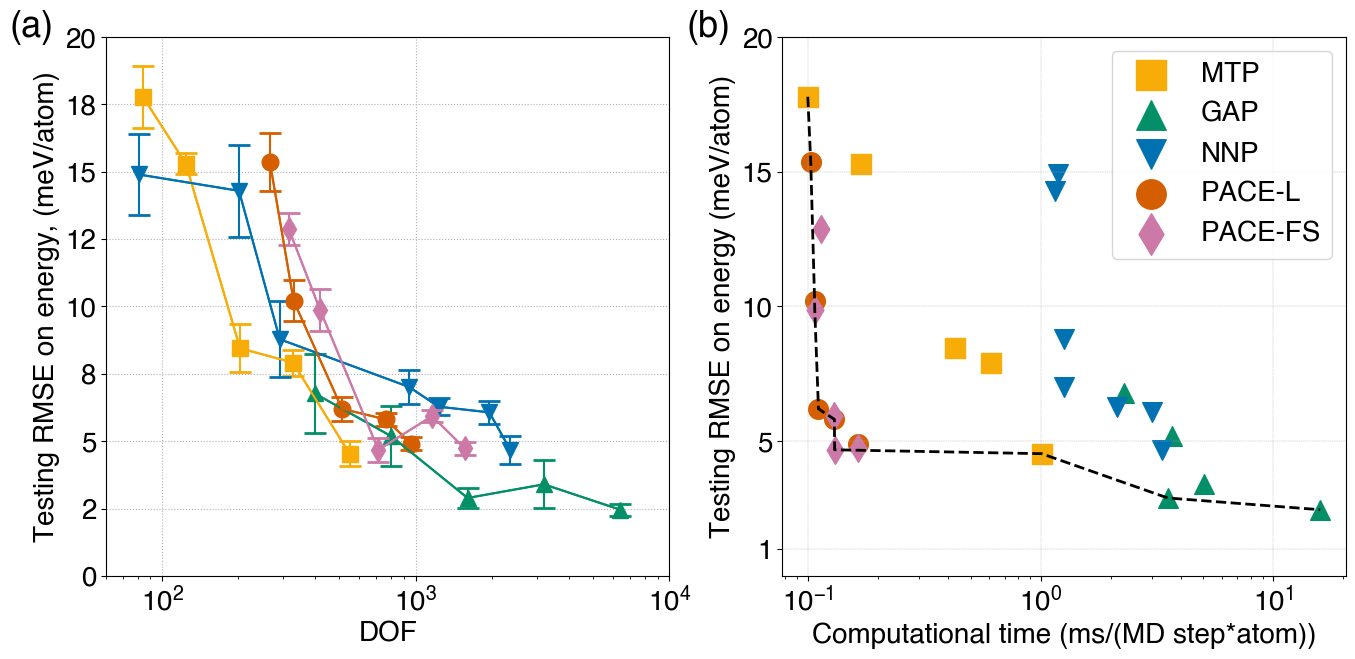

In [9]:
fig, ((ax,bx)) = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

# define a set of colors
c1='#F7AC08'
c2='#039069'
c3='#0072B2'
c4='#D55E00'
c5='#CC79A7'

ax.plot(mtp_dof[3:8], mtp_0001[2,3:8], marker='s', color=c1, markersize=12,  label='MTP')
ax.errorbar(mtp_dof[3:8], mtp_0001[2,3:8],yerr=mtp_std_Etest[3:8], ls='-', c=c1, capsize=8, capthick=2)
ax.plot(gap_dof, gap_rmse[5:10]*1000, marker='^', color=c2, markersize=12,  label='GAP')
ax.errorbar(gap_dof, gap_rmse[5:10]*1000, yerr=gap_std[5:10]*1000, ls='-', c=c2, capsize=8, capthick=2)
ax.plot(np.flip(np.sort(n2p2_dof1[::3])), np.sort(n2p2_error[1][::3]), marker='v', color=c3, markersize=12,  label='NNP')
ax.errorbar(np.flip(np.sort(n2p2_dof1[::3])), np.sort(n2p2_error[1][::3]), yerr=np.flip(n2p2_std_Etest), ls='-', c=c3, capsize=8, capthick=2)
ax.plot(pace_l_rmse[::2,1], pace_l_rmse[::2,3], marker='o',  color=c4, markersize=12, label='PACE-L')
ax.errorbar(pace_l_rmse[::2,1], pace_l_rmse[::2,3], yerr=pace_l_std_Etest, ls='-', c=c4, capsize=8, capthick=2)
ax.plot(pace_fs_rmse[::2,1], pace_fs_rmse[::2,3], marker='d', color=c5, markersize=12, label='PACE-FS')
ax.errorbar(pace_fs_rmse[::2,1], pace_fs_rmse[::2,3], yerr=pace_fs_std_Etest, ls='-', c=c5, capsize=8, capthick=2)

ax.grid(ls=':')
#ax.legend(loc=(0.2,1.07), ncols=5, markerscale=1.5, fontsize=20)
ax.set_xlim(60,10000)
ax.set_ylim(0,20)
ax.set_xlabel('DOF')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_ylabel('Testing RMSE on energy, (meV/atom)')
ax.set_xscale('log')

#-----------------------------------------Timing---------------------------------------------
bx.scatter(timing_mtp, Ersme_mtp, marker = 's',s=200, c=c1, label='MTP')
bx.scatter(timing_gap, Ersme_gap, marker = '^', s=200,c=c2, label='GAP')
bx.scatter(timing_n2p2, Ersme_n2p2, marker = 'v',s=200,  c=c3,label='NNP')
bx.scatter(timing_lpace, Ersme_lpace, marker = 'o',s=200, c=c4, label='PACE-L')
bx.scatter(timing_pace, Ersme_pace, marker = 'd',s=200, c=c5, label='PACE-FS')
print(Ersme_lpace)
bx.legend(ncols=1, markerscale=1.5, fontsize=20)

bx.set_xticks([0.01,0.1,1])
bx.set_ylim(0,20)
bx.set_yticks([1,5,10,15,20])
bx.plot(p_frontE[0], p_frontE[1], color='black', lw=2, ls='--') 
bx.set_xscale('log')
bx.grid(ls='--',lw=0.3)
bx.set_xlabel('Computational time (ms/(MD step*atom))')
bx.set_ylabel('Testing RMSE on energy (meV/atom)')

bx.arrow(0.13, 0.8, 0, 3.1, width=0.002, length_includes_head=True, head_width=0.015, head_length=1, fc='black')
bx.arrow(3.55, 0.3, 0, 2.1, width=0.002, length_includes_head=True, head_width=0.4, head_length=1, fc='black')

ax.annotate("(a)", xy=(-0.17, 1), weight='bold', xycoords="axes fraction", fontname='Helvetica',fontsize=26)
bx.annotate("(b)", xy=(-0.17, 1), weight='bold', xycoords="axes fraction", fontname='Helvetica',fontsize=26)

plt.show()

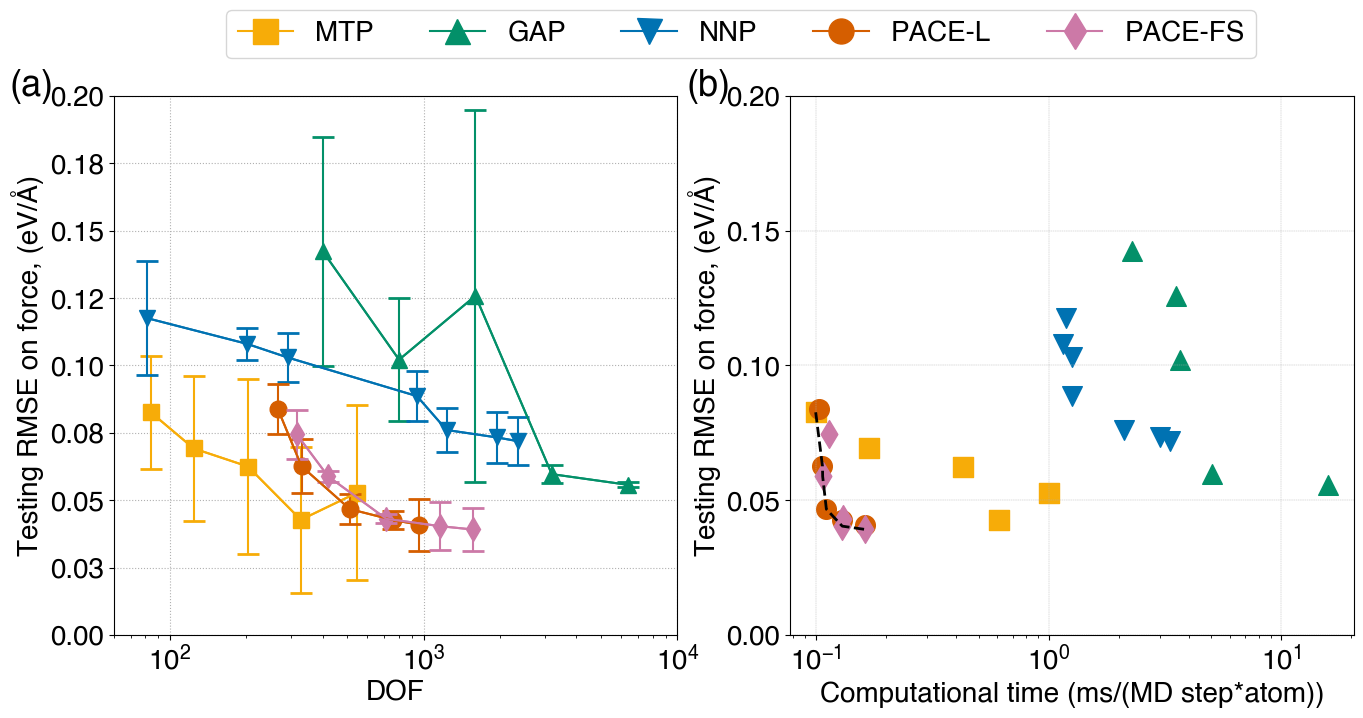

In [10]:
fig, ((ax,bx)) = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

# define a set of colors
c1='#F7AC08'
c2='#039069'
c3='#0072B2'
c4='#D55E00'
c5='#CC79A7'

ax.plot(mtp_dof[3:8], mtp_0001[3,3:8], marker='s', color=c1, markersize=12,  label='MTP')
ax.errorbar(mtp_dof[3:8], mtp_0001[3,3:8],yerr=mtp_std_Ftest[3:8], ls='-', c=c1, capsize=8, capthick=2)
ax.plot(gap_dof, gap_rmse[15:20], marker='^', color=c2, markersize=12,  label='GAP')
ax.errorbar(gap_dof, gap_rmse[15:20], yerr=gap_std[15:20], ls='-', c=c2, capsize=8, capthick=2)

ax.plot(np.flip(np.sort(n2p2_dof1[::3])), np.sort(n2p2_error[3][::3]), marker='v', color=c3, markersize=12,  label='NNP')
ax.errorbar(np.flip(np.sort(n2p2_dof1[::3])), np.sort(n2p2_error[3][::3]), yerr=np.flip(n2p2_std_Ftest), ls='-', c=c3, capsize=8, capthick=2)

ax.plot(pace_l_rmse[::2,1], pace_l_rmse[::2,5], marker='o',  color=c4, markersize=12, label='PACE-L')
ax.errorbar(pace_l_rmse[::2,1], pace_l_rmse[::2,5], yerr=pace_l_std_Ftest, ls='-', c=c4, capsize=8, capthick=2)
ax.plot(pace_fs_rmse[::2,1], pace_fs_rmse[::2,5], marker='d', color=c5, markersize=12, label='PACE-FS')
ax.errorbar(pace_fs_rmse[::2,1], pace_fs_rmse[::2,5], yerr=pace_fs_std_Ftest, ls='-', c=c5, capsize=8, capthick=2)

ax.grid(ls=':')
ax.legend(loc=(0.2,1.07), ncols=5, markerscale=1.5, fontsize=20)
ax.set_xlim(60,10000)
ax.set_ylim(0,0.2)
ax.set_xlabel('DOF')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('Testing RMSE on force, (eV/Å)')
ax.set_xscale('log')

#-----------------------------------------Timing---------------------------------------------
bx.scatter(timing_mtp, Frsme_mtp, marker = 's',s=200, c=c1, label='MTP')
bx.scatter(timing_gap, Frsme_gap, marker = '^', s=200,c=c2, label='GAP')
bx.scatter(timing_n2p2, Frsme_n2p2, marker = 'v',s=200,  c=c3,label='NNP')
bx.scatter(timing_lpace, Frsme_lpace, marker = 'o',s=200, c=c4, label='PACE-L')
bx.scatter(timing_pace, Frsme_pace, marker = 'd',s=200, c=c5, label='PACE-FS')

bx.set_xticks([0.01,0.1,1])
bx.set_ylim(0,0.2)
bx.set_yticks([0.0,0.05,0.10,0.15,0.20])
bx.plot(p_frontF[0], p_frontF[1], color='black', lw=2, ls='--') 
bx.set_xscale('log')
bx.grid(ls='--',lw=0.3)
bx.set_xlabel('Computational time (ms/(MD step*atom))')
bx.set_ylabel('Testing RMSE on force, (eV/Å)')

#bx.arrow(0.13, 0.8, 0, 3.1, width=0.002, length_includes_head=True, head_width=0.015, head_length=1, fc='black')
#bx.arrow(3.55, 0.3, 0, 2.1, width=0.002, length_includes_head=True, head_width=0.4, head_length=1, fc='black')

ax.annotate("(a)", xy=(-0.184, 1), weight='bold', xycoords="axes fraction", fontname='Helvetica',fontsize=26)
bx.annotate("(b)", xy=(-0.184, 1), weight='bold', xycoords="axes fraction", fontname='Helvetica',fontsize=26)

plt.savefig("/Users/leizhang/Desktop/supp/force_conterpart_fig3.pdf", format='pdf', dpi=600)
plt.show()